In [24]:
%matplotlib inline

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.datasets import mnist

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import f1_score

import seaborn as sns

In [14]:
type(data[0][0])

numpy.ndarray

In [20]:
data[0][1].shape

(60000,)

In [30]:
y = to_categorical(data[0][1])

In [31]:
pic = data[0][0]

In [29]:
img = Image.fromarray(pic)
img.save('first.png')
img.show()

In [39]:
x = np.array(list(map(lambda a: a.ravel(), pic)))

In [56]:
x.shape
x = x / 255

In [57]:
y.shape

(60000, 10)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [73]:
model = Sequential()
model.add(Dense(500, input_shape=(784,), activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(Adam(lr=0.001), 'categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s - loss: 0.2332 - acc: 0.9302 - val_loss: 0.1242 - val_acc: 0.9623
Epoch 2/5
48000/48000 [==============================] - 11s - loss: 0.1023 - acc: 0.9694 - val_loss: 0.1025 - val_acc: 0.9702
Epoch 3/5
48000/48000 [==============================] - 11s - loss: 0.0699 - acc: 0.9786 - val_loss: 0.0902 - val_acc: 0.9741
Epoch 4/5
48000/48000 [==============================] - 11s - loss: 0.0560 - acc: 0.9825 - val_loss: 0.0916 - val_acc: 0.9737
Epoch 5/5
48000/48000 [==============================] - 11s - loss: 0.0434 - acc: 0.9866 - val_loss: 0.1043 - val_acc: 0.9731


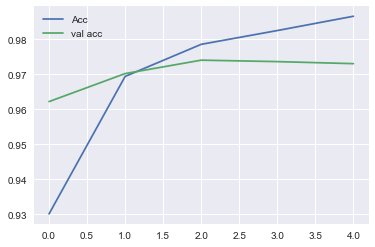

In [76]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Acc', 'val acc'])